In [1]:
train_dir = "input/training_set/training_set/"
test_dir = "input/test_set/test_set/"

In [2]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [3]:
class_names = list(os.listdir(train_dir))
print("The available classes:"+",".join(class_names))

The available classes:cats,dogs


In [4]:
all_files_train = []
for class_ in class_names:
    folder = train_dir+class_+"/"
    all_files_train.extend([folder+f for f in os.listdir(folder) if "jpg" in os.path.join(folder, f)])
count_train = len(all_files_train)
print(f"Total no. of images in training: {count_train}")

Total no. of images in training: 8005


In [5]:
all_files_test = []
for class_ in class_names:
    folder = test_dir+class_+"/"
    all_files_test.extend([folder+f for f in os.listdir(folder) if "jpg" in os.path.join(folder, f)])
count_test = len(all_files_test)
print(f"Total no. of images in testing: {count_test}")

Total no. of images in testing: 2023


In [6]:
def get_data(file_names, count):
    images = np.ndarray(shape=(count, 150, 150, 3), dtype=np.float32)
    label = []
    for i, file in enumerate(file_names):
        if "cat" in file:
            label.append(0)
        else:
            label.append(1)
        img = Image.open(file)
        img = img.resize((150, 150))
        images[i] = np.array(img)
    return images/255, np.array(label)

In [7]:
X_train, y_train = get_data(all_files_train, count_train)
X_test, y_test = get_data(all_files_test, count_test)

print(f"Training data size: {X_train.shape}")

Training data size: (8005, 150, 150, 3)


In [8]:
backup_X, backup_y = X_train, y_train

In [9]:
import random
def show_images(images, rows, cols, labels = None):
    label = ['Cat', 'Dog']
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 12))
    ax = ax.ravel()
    print(len(images))
    for i in range(rows*cols):
        x = random.randint(0, len(images))
        ax[i].imshow(images[x], plt.gray())
        if labels is not None:
            ax[i].set_title(label[labels[x]])
    plt.show()

8005


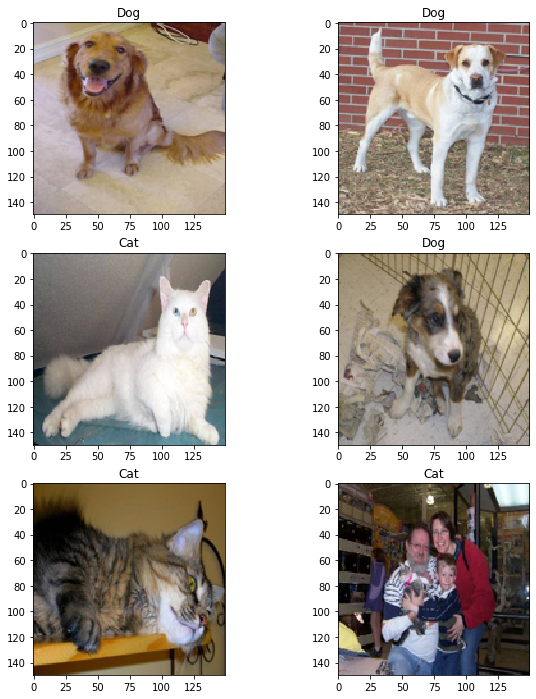

In [10]:
show_images(X_train,3, 2, y_train)

In [11]:
def rgb2gray(images):
    return np.sum(images/3, axis=3, keepdims=True)

X_train_gray = rgb2gray(X_train)
X_test_gray = rgb2gray(X_test)

New Train shape: (8005, 150, 150, 1)
New test shape: (2023, 150, 150, 1)
8005


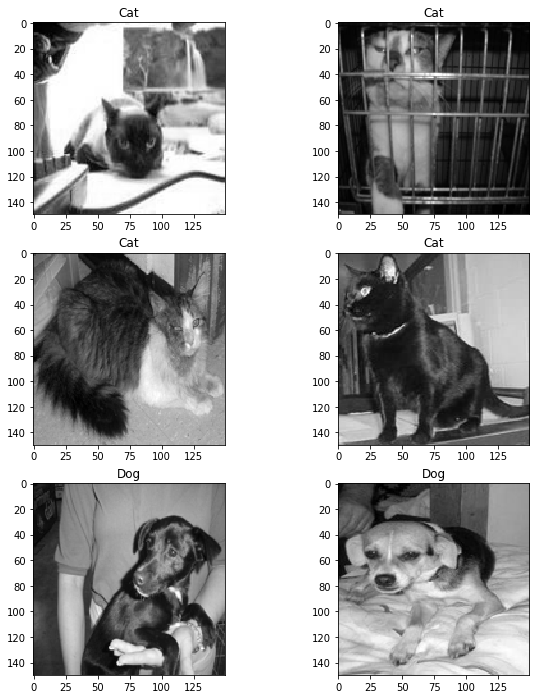

In [12]:
print(f"New Train shape: {X_train_gray.shape}")
print(f"New test shape: {X_test_gray.shape}")

show_images(X_train_gray.squeeze(), 3, 2, y_train)

In [13]:
X_train_gray = X_train

In [14]:
import cv2

new_X_train2 = []
new_y_train2 = []

new_count_train = [4000, 4005]
#i = random.randint(0, n_train-1)
for i in range(count_train):
    if(new_count_train[y_train[i]] < 10000):
        for j in range(3):
            
            higher_bound = random.randint(27, 32)
            lower_bound = random.randint(0, 5)
            point1 = np.float32([[0, 0], [32, 0], [0, 32], [32, 32]])
            point2 = np.float32([[0, 0], [higher_bound, lower_bound], [lower_bound, 32], [32, higher_bound]])
            M = cv2.getPerspectiveTransform(point1, point2)
            dst = cv2.warpPerspective(X_train_gray[i], M, (X_train[i].shape[0], X_train[i].shape[1]))
#             ax[2].imshow(dst, plt.gray())
#             ax[2].set_title('perspective')
            new_X_train2.append(dst
                               
                               )
            new_y_train2.append(y_train[i])
            
            tilt = random.randint(-12, 12)
            M = cv2.getRotationMatrix2D((X_train_gray[i].shape[0]/2, X_train_gray[i].shape[1]/2), tilt, 1)
            dst = cv2.warpAffine(X_train_gray[i], M, (X_train[i].shape[0], X_train[i].shape[1]))
#             ax[3].imshow(dst, plt.gray())
#             ax[3].set_title('Rotated')
            new_X_train2.append(dst)
            new_y_train2.append(y_train[i])
            
            new_count_train[y_train[i]]+=2

In [15]:
del new_X_train2, new_y_train2

In [16]:
import cv2

new_X_train = []
new_y_train = []

for i in range(count_train):
    new_X_train.append(cv2.flip(X_train[i], 1))
    new_y_train.append(y_train[i])
    
new_X_train = np.array(new_X_train)
new_y_train = np.array(new_y_train)

new_X_train = np.reshape(new_X_train, (np.shape(new_X_train)[0], 150, 150, 3))

X_train = np.concatenate((X_train, new_X_train), axis=0)
y_train = np.concatenate((y_train, new_y_train), axis=0)

In [19]:
del new_X_train

NameError: name 'new_X_train2' is not defined

(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(20005, 50, 50, 3)
20005


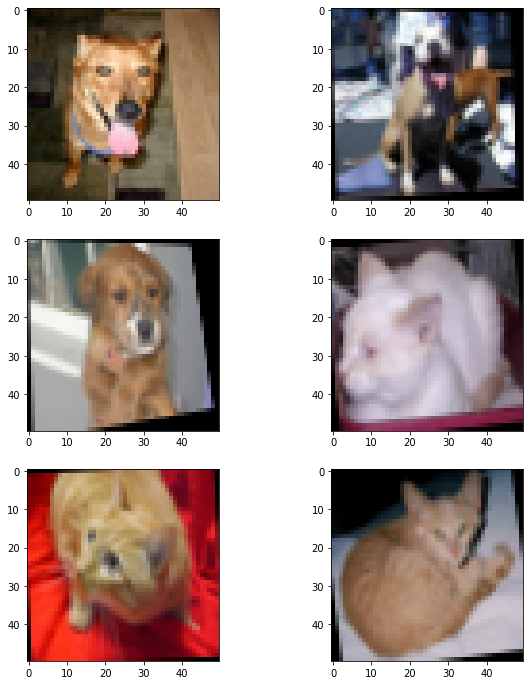

In [23]:
new_X_train2 = np.array(new_X_train2)
new_y_train2 = np.array(new_y_train2)

print(X_train_gray[0].shape)
print(new_X_train2[0].shape)

new_X_train2 = np.reshape(new_X_train2, (np.shape(new_X_train2)[0], 50, 50, 3))
print(new_X_train2[0].shape)

X_train_gray2 = np.concatenate((X_train_gray, new_X_train2), axis=0)
y_train_gray2 = np.concatenate((y_train, new_y_train2), axis=0)

print(X_train_gray2.shape)

show_images(X_train_gray2, 3, 2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

20005


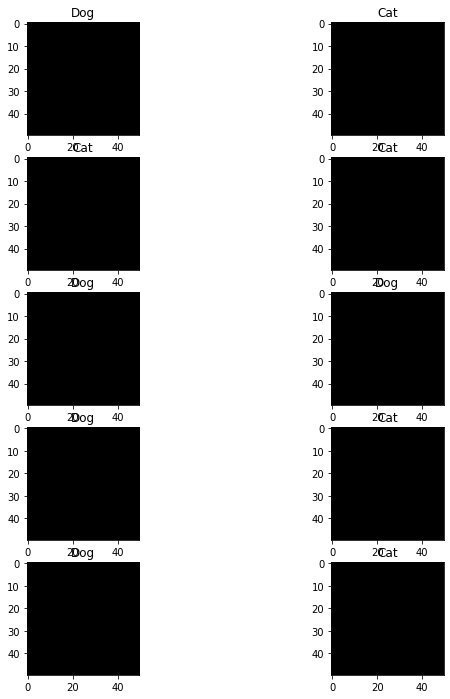

In [21]:
def normalize(image):
    return image/127.5-1

#X_train_copy = normalize(X_train_copy)
X_train_normalized = normalize(X_train_gray2)
X_test = normalize(X_test)


show_images(X_train_normalized.squeeze(), 5, 2, y_train_gray2)

In [20]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

Using TensorFlow backend.


In [21]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [23]:
print(f"Shape of Train: {X_train.shape}")
print(f"Shape of Valid: {X_valid.shape}")

Shape of Train: (12808, 150, 150, 3)
Shape of Valid: (3202, 150, 150, 3)


In [24]:
from keras import Sequential
from keras.layers.core import Dense, Flatten, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D

In [25]:
EPOCHS = 20
BATCH_SIZE= 155
n_classes = 2
rate = 0.001

In [26]:
# from keras import backend as K
# K.clear_session()

# model = Sequential()

# model.add(Conv2D(32, (5, 5), activation='relu',input_shape=(150, 150, 3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))
# model.add(Conv2D(64, (5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(32, (7, 7), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(84, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(n_classes))
# model.add(Activation('softmax'))

# model.summary()

In [ ]:
from keras import backend as K
K.clear_session

In [39]:
from keras.optimizers import RMSprop, adam, sgd
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=rate), metrics=['accuracy'])

In [40]:
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_valid, y_valid), verbose=1)

Train on 12808 samples, validate on 3202 samples
Epoch 1/20
12808/12808 [==============================] - 19s 1ms/step - loss: 0.7381 - accuracy: 0.5123 - val_loss: 0.6904 - val_accuracy: 0.5306
Epoch 2/20
12808/12808 [==============================] - 19s 1ms/step - loss: 0.6907 - accuracy: 0.5565 - val_loss: 0.6827 - val_accuracy: 0.5434
Epoch 3/20
12808/12808 [==============================] - 19s 1ms/step - loss: 0.6562 - accuracy: 0.6240 - val_loss: 0.6122 - val_accuracy: 0.6655
Epoch 4/20
12808/12808 [==============================] - 19s 1ms/step - loss: 0.5966 - accuracy: 0.6837 - val_loss: 0.5671 - val_accuracy: 0.7208
Epoch 5/20
12808/12808 [==============================] - 19s 1ms/step - loss: 0.5395 - accuracy: 0.7352 - val_loss: 0.5788 - val_accuracy: 0.6868
Epoch 6/20
12808/12808 [==============================] - 19s 1ms/step - loss: 0.4984 - accuracy: 0.7623 - val_loss: 0.4550 - val_accuracy: 0.7851
Epoch 7/20
12808/12808 [==============================] - 19s 1ms/ste

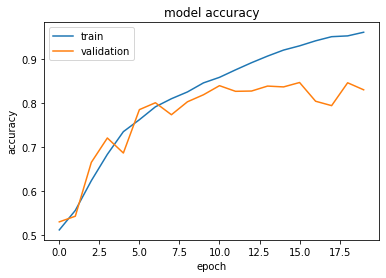

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [42]:
score = model.evaluate(X_test, y_test)

2023/2023 [==============================] - 1s 580us/step


In [43]:
score[1]

0.8240237236022949